In [1]:
import tensorflow as tf

D:\Coding\language_File\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# 一个会话可以运行多个操作
input1 = tf.constant(3.0)
input2 = tf.constant(4.0)
input3 = tf.constant(5.0)

add = tf.add(input1, input2)
multi = tf.multiply(input3, add)

with tf.Session() as sess:
    result = sess.run([multi, add])
    print(result)
    

[35.0, 7.0]


In [6]:
# feed
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict = {input1 : [7,], input2 : [9,]}))

[63.]


### 简单的案例

In [7]:
import tensorflow as tf
import numpy as np

In [11]:
# 生成随机点
x_data = np.random.rand(100)
y_data = x_data*0.1 + 0.2

b = tf.Variable(0.6)
a = tf.Variable(0.3)

y = a*x_data + b

# 定义损失函数
loss = tf.reduce_mean(tf.square(y_data - y))

# 定义优化方法：梯度下降
optimizer = tf.train.GradientDescentOptimizer(0.2)

#定义一个最小化代价函数
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train)
        if step % 20 == 0:
            print(step, sess.run([a, b, loss]))

0 [0.194205, 0.40037668, 0.061794605]
20 [0.09448184, 0.20293428, 2.675649e-06]
40 [0.096834205, 0.2016833, 8.8062893e-07]
60 [0.098183796, 0.2009657, 2.898383e-07]
80 [0.09895804, 0.20055403, 9.539611e-08]
100 [0.09940223, 0.20031784, 3.1397313e-08]
120 [0.09965706, 0.20018235, 1.0333919e-08]
140 [0.09980325, 0.20010462, 3.4015337e-09]
160 [0.099887125, 0.20006002, 1.1194932e-09]
180 [0.09993523, 0.20003444, 3.685263e-10]


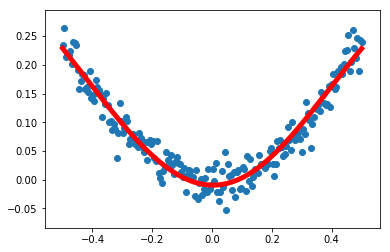

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# 线性回归
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])
# 定义中间层
w_L1 = tf.Variable(tf.random_normal([1, 10]))
b_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_L1 = tf.multiply(x, w_L1)+b_L1
L1 = tf.nn.tanh(Wx_L1)

w_out = tf.Variable(tf.random_normal([10, 1]))
b_out = tf.Variable(tf.zeros([1,1]))
Wx_out = tf.matmul(L1, w_out) + b_out
prediction = tf.nn.tanh(Wx_out)

#代价函数
loss = tf.reduce_mean(tf.square(y - prediction))

train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(2000):
        sess.run(train, feed_dict={x:x_data, y:y_data})
    
#     print(sess.run(loss))
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
        
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value, 'r-', lw=5)
    plt.show()
